C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


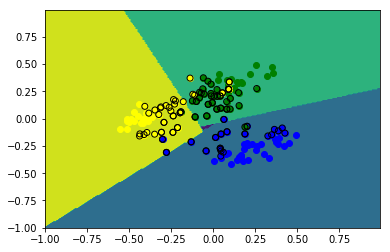

In [75]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

#讀資料
x_train = pd.read_csv('x_train.csv',header=None)
x_train_polynomial = pd.read_csv('x_train.csv',header=None)
t_train = pd.read_csv('t_train.csv',header=None)


#把1,2,3資料切出來做one verse one
x_train1 = x_train.iloc[0:50,:].values
t_train1 = t_train.iloc[0:50,:].values

x_train2 = x_train.iloc[50:100,:].values
t_train2 = t_train.iloc[50:100,:].values

x_train3 = x_train.iloc[100:150,:].values
t_train3 = t_train.iloc[100:150,:].values

x_train12 = np.vstack((x_train1,x_train2))
t_train12 = np.vstack((t_train1,t_train2))

x_train23 = np.vstack((x_train2,x_train3))
t_train23 = np.vstack((t_train2,t_train3))

x_train13 = np.vstack((x_train1,x_train3))
t_train13 = np.vstack((t_train1,t_train3))



#定義找線性解的函數
def findlinearw(x,y,a,b):
    for i in range(0,len(y)):
        if y[i] ==a:
            y[i] = 1
        if y[i] ==b:
            y[i] = -1
    #用sklearn找出multipliers
    #clf.dual_coef_是multipliers
    #clf.intercept_是b
    clf = SVC(gamma='auto',kernel='linear')
    clf.fit(x, y)
    summ = 0
    w = [[0,0]]
    for i in range(0,len(clf.support_)):
        w[0][0] = w[0][0]+(x[clf.support_[i]][0]*y[clf.support_[i]]*np.abs(clf.dual_coef_[0][i]))
        w[0][1] = w[0][1]+(x[clf.support_[i]][1]*y[clf.support_[i]]*np.abs(clf.dual_coef_[0][i]))
    predict = np.dot(x,np.transpose(w))
    for i in range(0,100):
        predict[i][0] = predict[i][0]+clf.intercept_
        if predict[i][0]>0:
            predict[i][0] = a
        if predict[i][0]<0:
            predict[i][0] = b
    return w,clf.intercept_,clf.support_
    
#找出one verse one linear 的解
w12,w12b,w12vector = findlinearw(x_train12,t_train12,1,2)  
w13,w13b,w13vector = findlinearw(x_train13,t_train13,1,3)  
w23,w23b,w23vector = findlinearw(x_train23,t_train23,2,3)  


#定義prediction function for linear 使用vote決定屬於哪一類別
def predictlinear(x):
    predict12 = np.dot(x,np.transpose(w12))
    for i in range(0,len(predict12)):
        predict12[i][0] = predict12[i][0]+w12b
        if predict12[i][0]>0:
            predict12[i][0] = 1
        if predict12[i][0]<0:
            predict12[i][0] = 2
        
            
    predict13 = np.dot(x,np.transpose(w13))
    for i in range(0,len(predict13)):
        predict13[i][0] = predict13[i][0]+w13b
        if predict13[i][0]>0:
            predict13[i][0] = 1
        if predict13[i][0]<0:
            predict13[i][0] = 3
            
    predict23 = np.dot(x,np.transpose(w23))
    for i in range(0,len(predict23)):
        predict23[i][0] = predict23[i][0]+w23b
        if predict23[i][0]>0:
            predict23[i][0] = 2
        if predict23[i][0]<0:
            predict23[i][0] = 3
            
    predict = np.dot(x,np.transpose(w23))

    for i in range(0,len(predict)):
        if predict12[i][0] == predict13[i][0]:
            predict[i][0] = 1
        if predict12[i][0] == predict23[i][0]:
            predict[i][0] = 2
        if predict13[i][0] == predict23[i][0]:
            predict[i][0] = 3
    return predict












#定義將資料轉成2次的函數
def topolynomial(x):
    x['x12']=0
    x['x1x2']=0
    x['x22']=0
    for i in range (0,len(x)):
        x1 = x.iloc[i,0]
        x2 = x.iloc[i,1]
        x.iloc[i,2] = x1*x1
        x.iloc[i,3] = x1*x2*math.sqrt(2)
        x.iloc[i,4] = x2*x2
    x = x.iloc[:,2:5]
    return x
polynomial = topolynomial(x_train_polynomial)




#將資料轉成二式
x_train1pol = polynomial.iloc[0:50,:].values

x_train2pol = polynomial.iloc[50:100,:].values

x_train3pol = polynomial.iloc[100:150,:].values

x_train12pol = np.vstack((x_train1pol,x_train2pol))

x_train23pol = np.vstack((x_train2pol,x_train3pol))

x_train13pol = np.vstack((x_train1pol,x_train3pol))





#定義找polynomial解的函數
def findpolynomialw(x,y,a,b):
    for i in range(0,len(y)):
        if y[i] ==a:
            y[i] = 1
        if y[i] ==b:
            y[i] = -1
    #用sklearn找出multipliers
    #clf.dual_coef_是multipliers
    #clf.intercept_是b    
    clf = SVC(gamma='auto',kernel='linear')
    clf.fit(x, y)
    summ = 0
    w = [[0,0,0]]
    for i in range(0,len(clf.support_)):
        w[0][0] = w[0][0]+(x[clf.support_[i]][0]*y[clf.support_[i]]*np.abs(clf.dual_coef_[0][i]))
        w[0][1] = w[0][1]+(x[clf.support_[i]][1]*y[clf.support_[i]]*np.abs(clf.dual_coef_[0][i]))
        w[0][2] = w[0][2]+(x[clf.support_[i]][2]*y[clf.support_[i]]*np.abs(clf.dual_coef_[0][i]))
    predict = np.dot(x,np.transpose(w))
    for i in range(0,100):
        predict[i][0] = predict[i][0]+clf.intercept_
        if predict[i][0]>0:
            predict[i][0] = a
        if predict[i][0]<0:
            predict[i][0] = b
    return w,clf.intercept_,clf.support_

#找出one verse one linear 的解
w12pol,w12bpol,w12polvector = findpolynomialw(x_train12pol,t_train12,1,2)
w13pol,w13bpol,w13polvector = findpolynomialw(x_train13pol,t_train13,1,3)  
w23pol,w23bpol,w23polvector = findpolynomialw(x_train23pol,t_train23,2,3)  



#定義prediction function for polynomial 使用vote決定屬於哪一類別
def predictpolynomial(x):
    predict12 = np.dot(x,np.transpose(w12pol))
    for i in range(0,len(predict12)):
        predict12[i][0] = predict12[i][0]+w12bpol
        if predict12[i][0]>0:
            predict12[i][0] = 1
        if predict12[i][0]<0:
            predict12[i][0] = 2
        
            
    predict13 = np.dot(x,np.transpose(w13pol))
    for i in range(0,len(predict13)):
        predict13[i][0] = predict13[i][0]+w13bpol
        if predict13[i][0]>0:
            predict13[i][0] = 1
        if predict13[i][0]<0:
            predict13[i][0] = 3
            
    predict23 = np.dot(x,np.transpose(w23pol))
    for i in range(0,len(predict23)):
        predict23[i][0] = predict23[i][0]+w23bpol
        if predict23[i][0]>0:
            predict23[i][0] = 2
        if predict23[i][0]<0:
            predict23[i][0] = 3
            
    predict = np.dot(x,np.transpose(w23pol))

    for i in range(0,len(predict)):
        if predict12[i][0] == predict13[i][0]:
            predict[i][0] = 1
        if predict12[i][0] == predict23[i][0]:
            predict[i][0] = 2
        if predict13[i][0] == predict23[i][0]:
            predict[i][0] = 3
    return predict








#使用meshgrid畫圖
xx, yy = np.meshgrid(np.arange(-1, 1, 0.01),
                         np.arange(-1, 1, 0.01))
test = np.transpose(np.vstack((xx.ravel(),yy.ravel())))
test111 = pd.DataFrame(test)


#畫linear的圖
def plotlinear():
    Z = predictlinear(test111)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis)
    plt.scatter(x_train1[ : ,[0]], x_train1[ : ,[1]],color = 'blue')
    plt.scatter(x_train2[ : ,[0]], x_train2[ : ,[1]],color = 'green')
    plt.scatter(x_train3[ : ,[0]], x_train3[ : ,[1]],color = 'yellow')

    plt.scatter(x_train12[ w12vector ,[0]], x_train12[ w12vector ,[1]],color = 'black',facecolors='none')
    plt.scatter(x_train13[ w13vector ,[0]], x_train13[ w13vector ,[1]],color = 'black',facecolors='none')
    plt.scatter(x_train23[ w23vector ,[0]], x_train23[ w23vector ,[1]],color = 'black',facecolors='none')


#畫polynomial的圖
def plotpolynomial():
    polynomialdata = topolynomial(test111)
    Z = predictpolynomial(polynomialdata)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis)
    plt.scatter(x_train1[ : ,[0]], x_train1[ : ,[1]],color = 'blue')
    plt.scatter(x_train2[ : ,[0]], x_train2[ : ,[1]],color = 'green')
    plt.scatter(x_train3[ : ,[0]], x_train3[ : ,[1]],color = 'yellow')
    
    plt.scatter(x_train12[ w12polvector ,[0]], x_train12[ w12polvector ,[1]],color = 'black',facecolors='none')
    plt.scatter(x_train13[ w13polvector ,[0]], x_train13[ w13polvector ,[1]],color = 'black',facecolors='none')
    plt.scatter(x_train23[ w23polvector ,[0]], x_train23[ w23polvector ,[1]],color = 'black',facecolors='none')
    


plotpolynomial()
#plotlinear()